# Structural reliability analysis

Notebook inspired by

http://www.math.chalmers.se/Stat/Grundutb/CTH/mve300/1112/files/Lecture10/Lecture10.pdf

Safety indexes:

  Cornell safety index
  Hasofer-Lind index

Concepts and examples

https://www.palisade.com/downloads/pdf/EngineeringReliabilityConcepts.pdf

Other reference

http://www.eurocodes.fi/1990/paasivu1990/sahkoinen1990/handbook2%5B1%5D.pdf

Main references

http://www.kstr.lth.se/fileadmin/kstr/pdf_files/STforsk_kurs-10/presentatione_rmm/reliability_analysis10__Kompatibilitetslaege_.pdf

http://web.mae.ufl.edu/nkim/eas6939/RBDO_Class.pdf

http://civile.utcb.ro/ccba/srracourse.pdf

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt

% matplotlib inline

Basic reliability problem

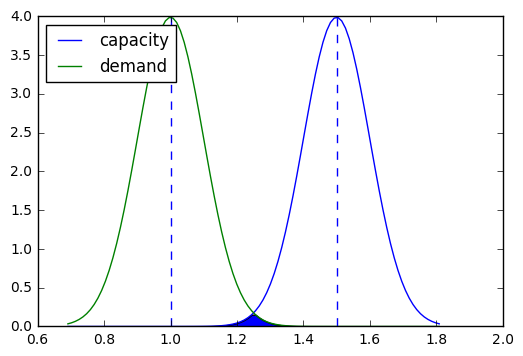

In [2]:
rv_cap = norm(loc=1.5, scale=0.1)
rv_dem = norm(loc=1.0, scale=0.1)
x = np.linspace(rv_dem.ppf(0.001), rv_cap.ppf(0.999), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_cap.pdf(x), label='capacity')
ax.plot(x, rv_dem.pdf(x), label='demand')
ax.axvline(rv_cap.stats(moments='m'), ls='--')
ax.axvline(rv_dem.stats(moments='m'), ls='--')
ax.fill_between(x, 0, np.minimum(rv_cap.pdf(x),rv_dem.pdf(x)))
plt.legend(loc='upper left')
plt.show()

Failure probability computation

In [3]:
def f1(x):
    return rv_dem.pdf(x)*rv_cap.cdf(x)

val, err = quad(f1, rv_dem.ppf(0.01), rv_cap.ppf(0.99))
print('Value = {:1.3e}, error = {}'.format(val, err))

Value = 2.035e-04, error = 1.513265591440708e-10


In [4]:
def f2(x):
    return (1-rv_dem.cdf(x))*rv_cap.pdf(x)

val, err = quad(f2, rv_dem.ppf(0.01), rv_cap.ppf(0.99))
print('Value = {:1.3e}, error = {}'.format(val, err))

Value = 2.035e-04, error = 1.5132655151607497e-10


Reliability index